# Welcome to the Sendy Logistics Challenge

In [1]:
#import numpy module
import numpy as np
# import the pandas module
import pandas as pd

#importing library for stats
import scipy.stats as st

# import the seaborn module
import seaborn as sns
# import the matplotlib module
import matplotlib.pyplot as plt

## Train Dataset
### Dataset used to train prediction model

In [2]:
# Train Dataset
train_df = pd.read_csv('data/Train.csv')

riders = pd.read_csv("data/Riders.csv")
riders['RidersID'] = range(len(riders))
train_df = pd.merge(train_df,riders,on="Rider Id")

train_df.head()

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),...,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival,No_Of_Orders,Age,Average_Rating,No_of_Ratings,RidersID
0,Order_No_4211,User_Id_633,Bike,3,Business,9,5,9:35:46 AM,9,5,...,36.830370,-1.300406,36.829741,Rider_Id_432,745,1637,1309,13.8,549,27
1,Order_No_27440,User_Id_2642,Bike,3,Personal,18,5,3:41:17 PM,18,5,...,36.787807,-1.356237,36.904295,Rider_Id_432,2886,1637,1309,13.8,549,27
2,Order_No_14170,User_Id_3339,Bike,3,Business,31,5,12:51:41 PM,31,5,...,36.782203,-1.273412,36.818206,Rider_Id_432,2615,1637,1309,13.8,549,27
3,Order_No_21727,User_Id_3523,Bike,3,Personal,2,2,7:12:10 AM,2,2,...,36.757377,-1.223520,36.802061,Rider_Id_432,2986,1637,1309,13.8,549,27
4,Order_No_8301,User_Id_87,Bike,2,Personal,22,2,10:40:58 AM,22,2,...,36.799220,-1.300431,36.752427,Rider_Id_432,1602,1637,1309,13.8,549,27


In [3]:
train_df.drop(["Arrival at Destination - Day of Month","Arrival at Destination - Time"],axis=1,inplace=True)

# Feature Engineering

In [4]:
def remove_colon(number):
    if number[-1]==':' or number[-1]=='A' or number[-1]=='P' :
        number = number[:-1]
        
    return number

def convert_dates_to_seconds(df, date,time):
    """takes in pandas dataframe and converts time stamps
    into seconds """
    date_in_seconds = []
    days_in_seconds = (df[date]-1)*3600*24
    
    for i in range(len(df)):
        hours = int(remove_colon(df[time][i][:2]))
        mins =  int(remove_colon(df[time][i][3:5]))
        seconds =  int(remove_colon(df[time][i][6:9]))
        
        if df[time][i][-2:] =='PM':
            date_in_seconds.append((hours+12)*3600+mins*60+seconds)
            
        else:
            date_in_seconds.append((hours)*3600+mins*60+seconds)
                
        
    
    return date_in_seconds


def correct_data_format_train(df):
    df = df.copy()
    """takes in data frame and transforms it into preferred data frame """
    
    #convert dates
    
    convert_columns = {"Placement - Day of Month":"Placement - Time","Confirmation - Day of Month":"Confirmation - Time",
                      "Pickup - Day of Month":"Pickup - Time","Arrival at Pickup - Day of Month":"Arrival at Pickup - Time"}
    
    #df["Placement - Time"] = convert_dates_to_seconds(df,date= "Placement - Day of Month",time ="Placement - Time")
    #df["Confirmation - Time"] = convert_dates_to_seconds(df,date= "Confirmation - Day of Month",time ="Confirmation - Time")
    #df["Pickup - Time"] = convert_dates_to_seconds(df,date= "Pickup - Day of Month",time ="Pickup - Time")
    #df["Arrival at Pickup - Time"] = convert_dates_to_seconds(df,date= "Arrival at Pickup - Day of Month",time ="Arrival at Pickup - Time")
    #drop columns
    drop_columns = ["Placement - Day of Month","Confirmation - Day of Month", "Precipitation in millimeters",
                    "Pickup - Day of Month","Arrival at Destination - Day of Month",
            "Arrival at Destination - Time","Arrival at Destination - Weekday (Mo = 1)","Order No","User Id","Vehicle Type","Order No","Rider Id"]
    for column_name in df.columns:
        if column_name in convert_columns:
            df[convert_columns[column_name]] = convert_dates_to_seconds(df,date=column_name ,time =convert_columns[column_name])
        elif column_name in drop_columns:
            df.drop(column_name,axis=1,inplace=True)
            
    #Fillingna and dummy variable
    df['Temperature'].fillna(df['Temperature'].mean(),inplace=True)
    df["Personal or Business"] = pd.get_dummies(df["Personal or Business"],drop_first=True)
    #pd.get_dummies(train["Rider Id"],drop_first=True)
    
    return df

In [5]:
train_df = correct_data_format_train(train_df)

# Visualizations

Text(0.5, 0, 'Platform type')

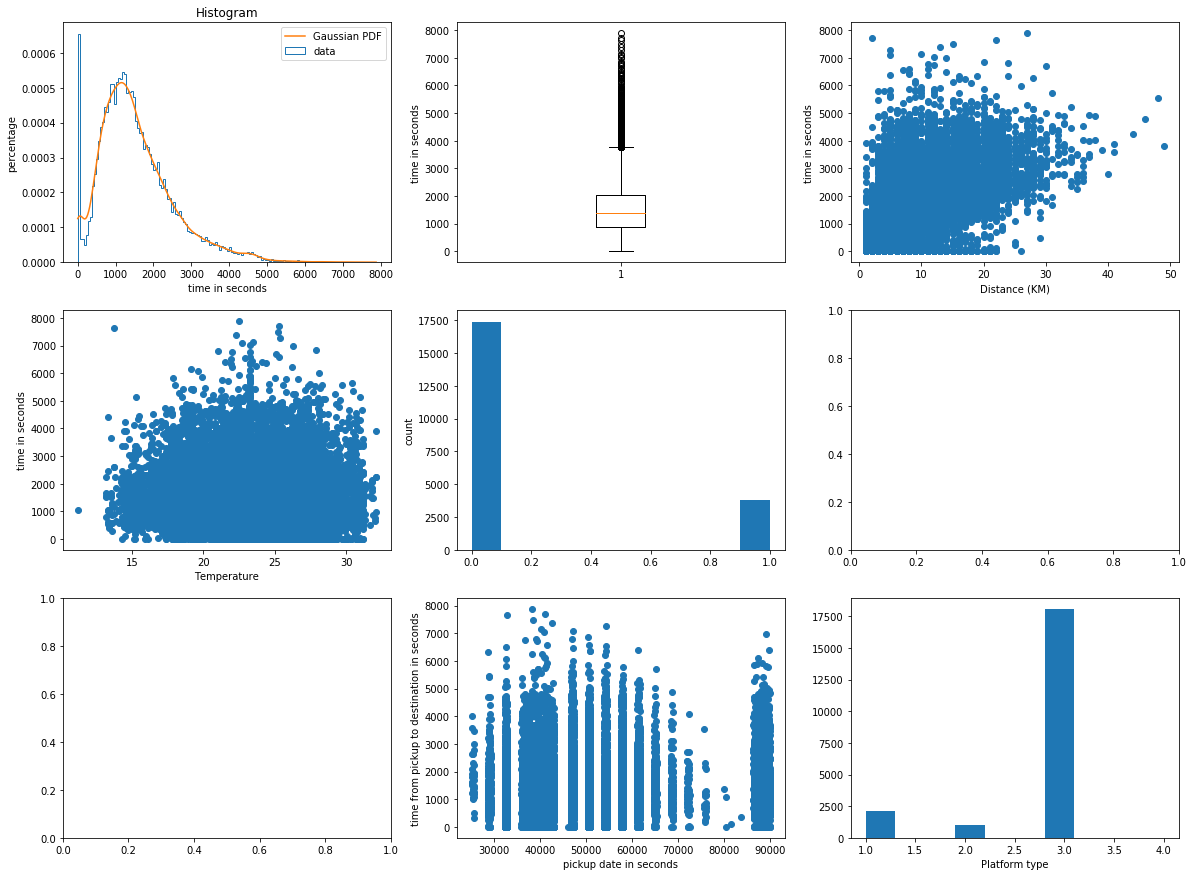

In [6]:
fig, ((ax1, ax2, ax3), (ax4, ax5 ,ax6),(ax7, ax8,ax9)) = plt.subplots(nrows=3, ncols=3, sharex=False, sharey=False,figsize = (20,15))


ax1.hist(train_df["Time from Pickup to Arrival"], 150, histtype = 'step',density = True, label = "data");
kde_xs = np.linspace(0, train_df["Time from Pickup to Arrival"].max(), 301)
kde = st.gaussian_kde(train_df["Time from Pickup to Arrival"])
ax1.plot(kde_xs, kde.pdf(kde_xs), label="Gaussian PDF")
ax1.legend(loc="upper right")
ax1.set_xlabel("time in seconds")
ax1.set_ylabel("percentage");
ax1.set_title("Histogram");


ax2.boxplot(x=train_df["Time from Pickup to Arrival"])
ax2.set_ylabel("time in seconds");

ax3.scatter(train_df["Distance (KM)"],train_df["Time from Pickup to Arrival"])
ax3.set_xlabel("Distance (KM)")
ax3.set_ylabel("time in seconds")

ax4.scatter(train_df["Temperature"],train_df["Time from Pickup to Arrival"])
ax4.set_xlabel("Temperature")
ax4.set_ylabel("time in seconds")

ax5.hist(train_df["Personal or Business"])
ax5.set_ylabel("count")

#ax6.scatter(train["Temperature"],train['Time from Pickup to Arrival'])
#ax6.set_ylabel("count")

#ax7.hist(train["Rider Id"], bins=960)
#ax7.set_ylabel("count")

ax8.scatter(train_df["Pickup - Time"],train_df["Time from Pickup to Arrival"])
ax8.set_xlabel("pickup date in seconds")
ax8.set_ylabel("time from pickup to destination in seconds")

ax9.hist(train_df["Platform Type"], bins = 10)
ax9.set_xlabel("Platform type")

## Test Dataset
### Dataset used to test prediction accuracy of model

In [7]:
# Test Dataset
test_df = pd.read_csv('data/Test.csv')
#test = correct_data_format(test)
test_df = pd.merge(test_df,riders,on="Rider Id")
test_df.head()

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),...,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,No_Of_Orders,Age,Average_Rating,No_of_Ratings,RidersID
0,Order_No_19248,User_Id_3355,Bike,3,Business,27,3,4:44:10 PM,27,3,...,-1.333275,36.870815,-1.305249,36.822390,Rider_Id_192,439,1511,13.3,171,183
1,Order_No_2699,User_Id_592,Bike,1,Personal,26,2,2:43:21 PM,26,2,...,-1.312745,36.875715,-1.288435,36.760677,Rider_Id_192,439,1511,13.3,171,183
2,Order_No_21486,User_Id_478,Bike,3,Business,29,5,11:55:05 AM,29,5,...,-1.255189,36.782203,-1.293393,36.790237,Rider_Id_192,439,1511,13.3,171,183
3,Order_No_19336,User_Id_2801,Bike,3,Business,2,1,9:23:21 AM,2,1,...,-1.310451,36.868724,-1.259542,36.787118,Rider_Id_192,439,1511,13.3,171,183
4,Order_No_20374,User_Id_3465,Bike,3,Business,14,4,12:55:59 PM,14,4,...,-1.333275,36.870815,-1.255189,36.782203,Rider_Id_192,439,1511,13.3,171,183


In [8]:
def correct_data_test(df):
    df = df.copy()
    """takes in data frame and transforms it into preferred data frame """
    
    #convert dates
    
    convert_columns = {"Placement - Day of Month":"Placement - Time","Confirmation - Day of Month":"Confirmation - Time",
                      "Pickup - Day of Month":"Pickup - Time","Arrival at Pickup - Day of Month":"Arrival at Pickup - Time"}
    
    #df["Placement - Time"] = convert_dates_to_seconds(df,date= "Placement - Day of Month",time ="Placement - Time")
    #df["Confirmation - Time"] = convert_dates_to_seconds(df,date= "Confirmation - Day of Month",time ="Confirmation - Time")
    #df["Pickup - Time"] = convert_dates_to_seconds(df,date= "Pickup - Day of Month",time ="Pickup - Time")
    #df["Arrival at Pickup - Time"] = convert_dates_to_seconds(df,date= "Arrival at Pickup - Day of Month",time ="Arrival at Pickup - Time")
    #drop columns
    drop_columns = ["Placement - Day of Month","Confirmation - Day of Month", "Precipitation in millimeters",
                    "Pickup - Day of Month","Arrival at Destination - Day of Month",
            "Arrival at Destination - Time","User Id","Vehicle Type","Rider Id"]
    for column_name in df.columns:
        if column_name in convert_columns:
            df[convert_columns[column_name]] = convert_dates_to_seconds(df,date=column_name ,time =convert_columns[column_name])
        elif column_name in drop_columns:
            df.drop(column_name,axis=1,inplace=True)
            
    #Fillingna and dummy variable
    df['Temperature'].fillna(df['Temperature'].mean(),inplace=True)
    df["Personal or Business"] = pd.get_dummies(df["Personal or Business"],drop_first=True)
    #pd.get_dummies(train["Rider Id"],drop_first=True)
    
    return df

In [9]:
test_df = correct_data_test(test_df)
submission = pd.DataFrame({"Order_No":test_df.pop("Order No")})
test_df.head()

,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Confirmation - Time,Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),...,Temperature,Pickup Lat,Pickup Long,Destination Lat,Destination Long,No_Of_Orders,Age,Average_Rating,No_of_Ratings,RidersID
0,3,0,27,3,57840,27,3,57849,27,3,...,23.24612,-1.333275,36.870815,-1.305249,36.822390,439,1511,13.3,171,183
1,1,1,26,2,50581,26,2,50826,26,2,...,23.24612,-1.312745,36.875715,-1.288435,36.760677,439,1511,13.3,171,183
2,3,0,29,5,42905,29,5,43092,29,5,...,19.70000,-1.255189,36.782203,-1.293393,36.790237,439,1511,13.3,171,183
3,3,0,2,1,32581,2,1,32584,2,1,...,16.40000,-1.310451,36.868724,-1.259542,36.787118,439,1511,13.3,171,183
4,3,0,14,4,89759,14,4,46924,14,4,...,21.30000,-1.333275,36.870815,-1.255189,36.782203,439,1511,13.3,171,183


In [10]:
submission

,Order_No
0,Order_No_19248
1,Order_No_2699
2,Order_No_21486
3,Order_No_19336
4,Order_No_20374
...,...
7063,Order_No_5207
7064,Order_No_11108
7065,Order_No_15696
7066,Order_No_14332


# Fit Multiple Linear regression to data

In [11]:
#separate independent and dependant variables

x_train = train_df.drop("Time from Pickup to Arrival",axis = 1).values

y_train = train_df.pop("Time from Pickup to Arrival").values

In [12]:
#from sklearn.model_selection import train_test_split
#x_train,x_validation,y_train,y_validation = train_test_split(x_train_all,y_train_all,test_size=0.2)

In [13]:
#fit the multiple linear regression to the training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [14]:
#make the prediction
y_pred = regressor.predict(test_df)

In [15]:
submission["Time from Pickup to Arrival"] = y_pred.round(0)
submission.to_csv('Submissions/submission_multilinear.csv', index=False)

# fitting polynomial regression model

In [16]:
#build the polynomial regression model
from sklearn.preprocessing import PolynomialFeatures
polynomial_regressor = PolynomialFeatures(degree = 3)
x_poly = polynomial_regressor.fit_transform(x_train)
linear_regressor2 = LinearRegression()
linear_regressor2.fit(x_poly,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [17]:
#make the prediction
y_pred = linear_regressor2.predict(polynomial_regressor.fit_transform(test_df))



In [18]:
submission["Time from Pickup to Arrival"] = y_pred.round(0)
submission.to_csv('Submissions/submission_polynomial.csv', index=False)

# Support vector regression

# Decision Tree Regression

In [19]:
#fit the decision tree regressor
from sklearn.tree import DecisionTreeRegressor 
DT_regressor = DecisionTreeRegressor(random_state=0)
DT_regressor.fit(x_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

# Random forest regression

# Sample submission

In [46]:
# Sample Submission
sub_sample_df = pd.read_csv('data/SampleSubmission.csv')
sub_sample_df.head()

,Order_No,Time from Pickup to Arrival
0,Order_No_19248,567.0
1,Order_No_12736,4903.0
2,Order_No_768,5649.0
3,Order_No_15332,NaN
4,Order_No_21373,NaN


# My submission 

In [47]:
# Sample Submission
multilinear = pd.read_csv('Submissions/submission_multilinear.csv')
polynomial = pd.read_csv('Submissions/submission_polynomial.csv')
pd.merge(multilinear,polynomial, on = 'Order_No')

,Order_No,Time from Pickup to Arrival_x,Time from Pickup to Arrival_y
0,Order_No_19248,1427.0,1576.0
1,Order_No_2699,2555.0,2763.0
2,Order_No_21486,1686.0,2205.0
3,Order_No_19336,2101.0,1824.0
4,Order_No_20374,2101.0,3914.0
...,...,...,...
7063,Order_No_5207,1274.0,1604.0
7064,Order_No_11108,3151.0,3144.0
7065,Order_No_15696,1820.0,1810.0
7066,Order_No_14332,2518.0,2634.0
